In [89]:
import pandas as pd
import requests
import datetime

def create_data_object(line):
    (data, ts) = line
    return {
        'timestamp': ts,
        'cloud_amount': float(data[0]),
        'pressure': float(data[1]),
        'percipitation_amount': float(data[2]),
        'relative_humidity': float(data[3]),
        'precipitation_intensity': float(data[4]),
        'snow_depth': float(data[5]),
        'air_temperature': float(data[6]),
        'dew_point_temperature': float(data[7]),
        'horizontal_visibility': float(data[8]),
        'wind_direction': float(data[9]),
        'gust_speed': float(data[10]),
        'wind_speed': float(data[11])
    }

def get_data(start_date, end_date):
    fmisid = '100971'
    response = requests.get(f'https://1.opendata.fmi.fi/wfs/eng?request=getFeature&storedquery_id=fmi%3A%3Aobservations%3A%3Aweather%3A%3Amultipointcoverage&parameters=n_man%2Cp_sea%2Cr_1h%2Crh%2Cri_10min%2Csnow_aws%2Ct2m%2Ctd%2Cvis%2Cwd_10min%2Cwg_10min%2Cws_10min&starttime={start_date}&endtime={end_date}&timestep=60&fmisid={fmisid}')
    text = response.text
    
    timestamps_and_pos = text.split('<gmlcov:positions>')[1].split('</gmlcov:positions>')[0]
    timestamps = [datetime.datetime.utcfromtimestamp(int(ts.split(' ')[-1])) for ts in timestamps_and_pos.split('\n') if ts.split(' ')[-1] != '']
    
    data_rows = text.split('<gml:doubleOrNilReasonTupleList>')[1].split('</gml:doubleOrNilReasonTupleList>')[0].split('\n')
    data = [dr.strip().split(' ') for dr in data_rows if dr.strip() != '']

    merged = zip(data, timestamps)

    return map(create_data_object, merged)

data = []
end_time = datetime.datetime.fromisoformat('2021-01-01T00:00:00')
while end_time.isoformat() != '2010-01-01T00:00:00':
    start_time = end_time - datetime.timedelta(weeks=1)
    print(f'from {start_time.isoformat()} to {end_time.isoformat()}')
    res = get_data(start_time.isoformat(), end_time.isoformat())
    data.append(list(res))
    end_time = start_time
    print('done!')


from 2020-12-25T00:00:00 to 2021-01-01T00:00:00
done!
from 2020-12-18T00:00:00 to 2020-12-25T00:00:00
done!
from 2020-12-11T00:00:00 to 2020-12-18T00:00:00
done!
from 2020-12-04T00:00:00 to 2020-12-11T00:00:00
done!
from 2020-11-27T00:00:00 to 2020-12-04T00:00:00
done!
from 2020-11-20T00:00:00 to 2020-11-27T00:00:00
done!
from 2020-11-13T00:00:00 to 2020-11-20T00:00:00
done!
from 2020-11-06T00:00:00 to 2020-11-13T00:00:00
done!
from 2020-10-30T00:00:00 to 2020-11-06T00:00:00
done!
from 2020-10-23T00:00:00 to 2020-10-30T00:00:00
done!
from 2020-10-16T00:00:00 to 2020-10-23T00:00:00
done!
from 2020-10-09T00:00:00 to 2020-10-16T00:00:00
done!
from 2020-10-02T00:00:00 to 2020-10-09T00:00:00
done!
from 2020-09-25T00:00:00 to 2020-10-02T00:00:00
done!
from 2020-09-18T00:00:00 to 2020-09-25T00:00:00
done!
from 2020-09-11T00:00:00 to 2020-09-18T00:00:00
done!
from 2020-09-04T00:00:00 to 2020-09-11T00:00:00
done!
from 2020-08-28T00:00:00 to 2020-09-04T00:00:00
done!
from 2020-08-21T00:00:00 to 

done!
from 2018-01-26T00:00:00 to 2018-02-02T00:00:00
done!
from 2018-01-19T00:00:00 to 2018-01-26T00:00:00
done!
from 2018-01-12T00:00:00 to 2018-01-19T00:00:00
done!
from 2018-01-05T00:00:00 to 2018-01-12T00:00:00
done!
from 2017-12-29T00:00:00 to 2018-01-05T00:00:00
done!
from 2017-12-22T00:00:00 to 2017-12-29T00:00:00
done!
from 2017-12-15T00:00:00 to 2017-12-22T00:00:00
done!
from 2017-12-08T00:00:00 to 2017-12-15T00:00:00
done!
from 2017-12-01T00:00:00 to 2017-12-08T00:00:00
done!
from 2017-11-24T00:00:00 to 2017-12-01T00:00:00
done!
from 2017-11-17T00:00:00 to 2017-11-24T00:00:00
done!
from 2017-11-10T00:00:00 to 2017-11-17T00:00:00
done!
from 2017-11-03T00:00:00 to 2017-11-10T00:00:00
done!
from 2017-10-27T00:00:00 to 2017-11-03T00:00:00
done!
from 2017-10-20T00:00:00 to 2017-10-27T00:00:00
done!
from 2017-10-13T00:00:00 to 2017-10-20T00:00:00
done!
from 2017-10-06T00:00:00 to 2017-10-13T00:00:00
done!
from 2017-09-29T00:00:00 to 2017-10-06T00:00:00
done!
from 2017-09-22T00:00:

done!
from 2015-02-27T00:00:00 to 2015-03-06T00:00:00
done!
from 2015-02-20T00:00:00 to 2015-02-27T00:00:00
done!
from 2015-02-13T00:00:00 to 2015-02-20T00:00:00
done!
from 2015-02-06T00:00:00 to 2015-02-13T00:00:00
done!
from 2015-01-30T00:00:00 to 2015-02-06T00:00:00
done!
from 2015-01-23T00:00:00 to 2015-01-30T00:00:00
done!
from 2015-01-16T00:00:00 to 2015-01-23T00:00:00
done!
from 2015-01-09T00:00:00 to 2015-01-16T00:00:00
done!
from 2015-01-02T00:00:00 to 2015-01-09T00:00:00
done!
from 2014-12-26T00:00:00 to 2015-01-02T00:00:00
done!
from 2014-12-19T00:00:00 to 2014-12-26T00:00:00
done!
from 2014-12-12T00:00:00 to 2014-12-19T00:00:00
done!
from 2014-12-05T00:00:00 to 2014-12-12T00:00:00
done!
from 2014-11-28T00:00:00 to 2014-12-05T00:00:00
done!
from 2014-11-21T00:00:00 to 2014-11-28T00:00:00
done!
from 2014-11-14T00:00:00 to 2014-11-21T00:00:00
done!
from 2014-11-07T00:00:00 to 2014-11-14T00:00:00
done!
from 2014-10-31T00:00:00 to 2014-11-07T00:00:00
done!
from 2014-10-24T00:00:

done!
from 2012-03-30T00:00:00 to 2012-04-06T00:00:00
done!
from 2012-03-23T00:00:00 to 2012-03-30T00:00:00
done!
from 2012-03-16T00:00:00 to 2012-03-23T00:00:00
done!
from 2012-03-09T00:00:00 to 2012-03-16T00:00:00
done!
from 2012-03-02T00:00:00 to 2012-03-09T00:00:00
done!
from 2012-02-24T00:00:00 to 2012-03-02T00:00:00
done!
from 2012-02-17T00:00:00 to 2012-02-24T00:00:00
done!
from 2012-02-10T00:00:00 to 2012-02-17T00:00:00
done!
from 2012-02-03T00:00:00 to 2012-02-10T00:00:00
done!
from 2012-01-27T00:00:00 to 2012-02-03T00:00:00
done!
from 2012-01-20T00:00:00 to 2012-01-27T00:00:00
done!
from 2012-01-13T00:00:00 to 2012-01-20T00:00:00
done!
from 2012-01-06T00:00:00 to 2012-01-13T00:00:00
done!
from 2011-12-30T00:00:00 to 2012-01-06T00:00:00
done!
from 2011-12-23T00:00:00 to 2011-12-30T00:00:00
done!
from 2011-12-16T00:00:00 to 2011-12-23T00:00:00
done!
from 2011-12-09T00:00:00 to 2011-12-16T00:00:00
done!
from 2011-12-02T00:00:00 to 2011-12-09T00:00:00
done!
from 2011-11-25T00:00:

In [90]:
def flat(l):
    return [item for sublist in l for item in sublist]

df = pd.DataFrame(flat(data))

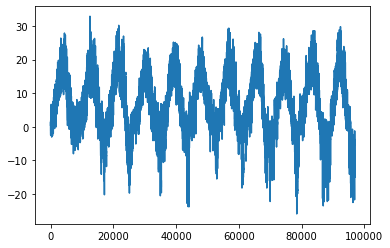

In [91]:
import matplotlib.pyplot as plt

plt.plot(df['air_temperature'])

In [92]:
df.to_csv('./data/weather_kaisaniemi.csv', index=False)

## Calculate the mean of the two stations:

In [93]:
kump = pd.read_csv('./data/weather.csv')

In [94]:
kump

,timestamp,cloud_amount,pressure,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
0,2020-12-25 00:00:00,7.0,1002.4,0.0,96.0,0.0,0.0,0.1,-0.5,21720.0,10.0,3.8,2.4
1,2020-12-25 01:00:00,7.0,1002.6,0.0,95.0,0.0,0.0,0.2,-0.5,39440.0,343.0,4.6,3.3
2,2020-12-25 02:00:00,7.0,1002.7,0.0,94.0,0.0,0.0,0.2,-0.6,50000.0,338.0,4.1,2.9
3,2020-12-25 03:00:00,7.0,1002.8,0.0,91.0,0.0,0.0,0.0,-1.2,50000.0,356.0,4.1,2.3
4,2020-12-25 04:00:00,7.0,1003.0,0.0,94.0,0.0,0.0,0.0,-0.9,22000.0,332.0,4.9,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97001,2010-01-07 20:00:00,7.0,1009.8,NaN,91.0,NaN,42.0,-10.6,-11.8,19030.0,1.0,8.6,5.4
97002,2010-01-07 21:00:00,7.0,1010.5,NaN,90.0,NaN,42.0,-11.1,-12.4,21190.0,353.0,8.1,5.0
97003,2010-01-07 22:00:00,5.0,1010.9,NaN,90.0,NaN,42.0,-11.6,-13.0,21830.0,354.0,8.1,4.4
97004,2010-01-07 23:00:00,1.0,1011.6,NaN,89.0,NaN,42.0,-12.4,-13.7,24060.0,349.0,6.2,4.0


In [96]:
df

,timestamp,cloud_amount,pressure,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
0,2020-12-25 00:00:00,5.0,1002.5,0.0,93.0,0.0,0.0,0.5,-0.4,40970.0,57.0,2.9,2.0
1,2020-12-25 01:00:00,8.0,1002.6,0.0,93.0,0.0,0.0,0.7,-0.3,50000.0,26.0,3.9,2.6
2,2020-12-25 02:00:00,7.0,1002.7,0.0,92.0,0.0,0.0,0.5,-0.7,50000.0,11.0,4.0,2.2
3,2020-12-25 03:00:00,7.0,1002.8,0.0,91.0,0.0,0.0,0.3,-1.0,50000.0,20.0,3.4,2.0
4,2020-12-25 04:00:00,8.0,1003.1,0.0,90.0,0.0,0.0,0.6,-0.8,13580.0,12.0,4.5,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97001,2010-01-07 20:00:00,7.0,1009.8,NaN,89.0,0.0,36.0,-10.6,-12.0,16890.0,2.0,8.0,4.8
97002,2010-01-07 21:00:00,7.0,1010.4,NaN,89.0,0.0,36.0,-11.0,-12.5,16320.0,360.0,8.2,4.8
97003,2010-01-07 22:00:00,1.0,1010.7,NaN,88.0,0.0,36.0,-11.6,-13.2,16870.0,4.0,8.3,4.9
97004,2010-01-07 23:00:00,1.0,1011.4,NaN,89.0,0.0,36.0,-12.3,-13.8,18970.0,356.0,7.9,4.8


In [101]:
df = df.fillna(kump)

timestamp


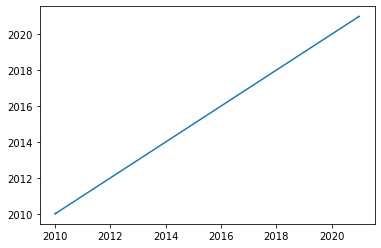

cloud_amount


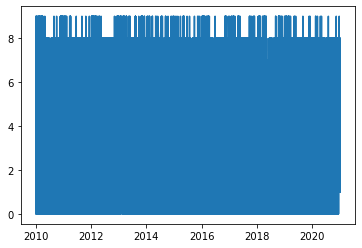

pressure


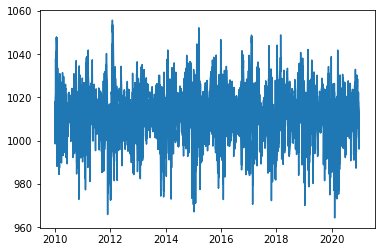

percipitation_amount


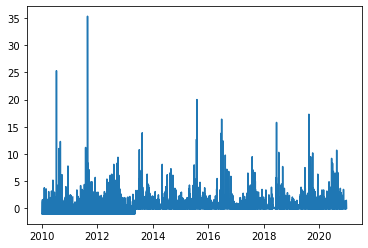

relative_humidity


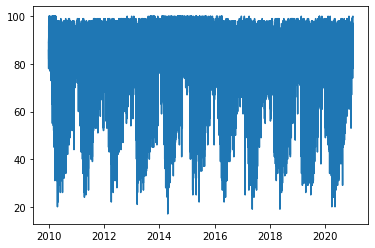

precipitation_intensity


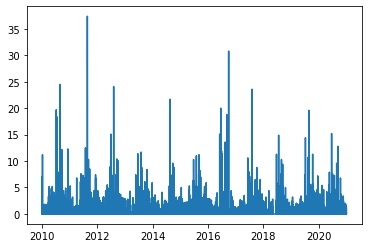

snow_depth


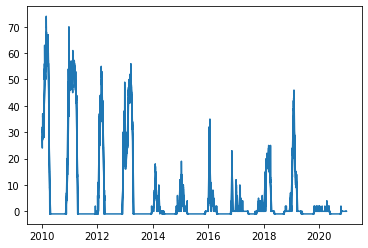

air_temperature


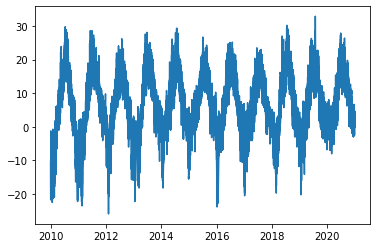

dew_point_temperature


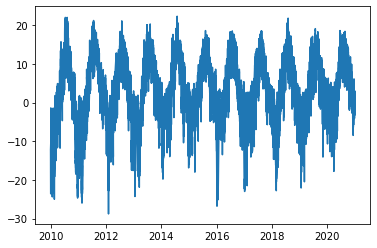

horizontal_visibility


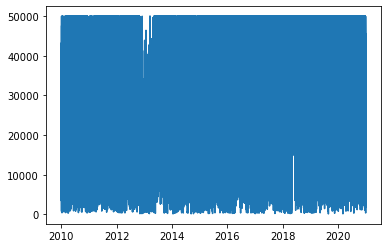

wind_direction


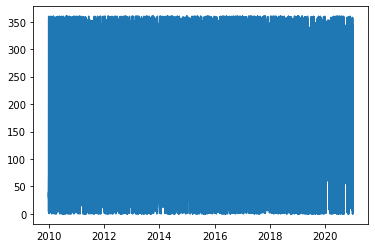

gust_speed


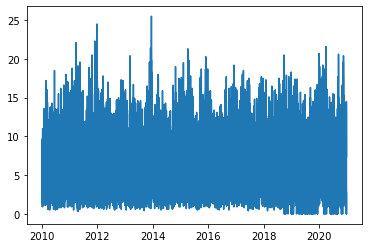

wind_speed


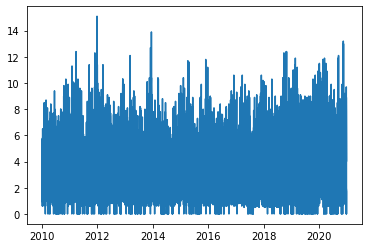

In [102]:
for column in df.columns:
    print(column)
    plt.plot(df['timestamp'], df[column])
    plt.show()

In [103]:
df.to_csv('./data/weather_final.csv', index=False)

## Data from Lohja (Olivia)

In [2]:
import pandas as pd

In [5]:
lohja = pd.read_csv('./data/weather_lohja.csv')

In [6]:
lohja

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Precipitation amount (mm),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
0,2014,12,31,00:00,UTC,-,-,0.1,98,0,11,1.8,1.6,-,-,-,-
1,2014,12,31,01:00,UTC,-,-,0,97,0,10,1.9,1.5,-,-,-,-
2,2014,12,31,02:00,UTC,-,-,0,97,0,10,2.1,1.6,-,-,-,-
3,2014,12,31,03:00,UTC,-,-,0,97,0,10,2.5,2,-,-,-,-
4,2014,12,31,04:00,UTC,-,-,0,96,0,9,2.9,2.3,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,2016,4,19,20:00,UTC,-,-,0,87,0,-1,4.7,2.7,-,-,-,-
11421,2016,4,19,21:00,UTC,-,-,0,89,0,-1,4.6,3,-,-,-,-
11422,2016,4,19,22:00,UTC,-,-,0.2,90,0,-1,3.9,2.5,-,-,-,-
11423,2016,4,19,23:00,UTC,-,-,0,83,0,-1,3.4,0.8,-,-,-,-


In [7]:
lohja.dtypes

Year                               int64
m                                  int64
d                                  int64
Time                              object
Time zone                         object
Cloud amount (1/8)                object
Pressure (msl) (hPa)              object
Precipitation amount (mm)         object
Relative humidity (%)             object
Precipitation intensity (mm/h)    object
Snow depth (cm)                   object
Air temperature (degC)            object
Dew-point temperature (degC)      object
Horizontal visibility (m)         object
Wind direction (deg)              object
Gust speed (m/s)                  object
Wind speed (m/s)                  object
dtype: object

In [12]:
lohja['Year'] = lohja['Year'].astype(str)

In [14]:
lohja['m'] = lohja['m'].astype(str)

In [15]:
lohja['d'] = lohja['d'].astype(str)

In [18]:
lohja['date'] = lohja['Year'] +'-'+ lohja['m'] +'-'+ lohja['d'] +' '+ lohja['Time']

In [19]:
lohja

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Precipitation amount (mm),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),date
0,2014,12,12,00:00,UTC,-,-,0.1,98,0,11,1.8,1.6,-,-,-,-,2014-12-12 00:00
1,2014,12,12,01:00,UTC,-,-,0,97,0,10,1.9,1.5,-,-,-,-,2014-12-12 01:00
2,2014,12,12,02:00,UTC,-,-,0,97,0,10,2.1,1.6,-,-,-,-,2014-12-12 02:00
3,2014,12,12,03:00,UTC,-,-,0,97,0,10,2.5,2,-,-,-,-,2014-12-12 03:00
4,2014,12,12,04:00,UTC,-,-,0,96,0,9,2.9,2.3,-,-,-,-,2014-12-12 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,2016,4,4,20:00,UTC,-,-,0,87,0,-1,4.7,2.7,-,-,-,-,2016-4-4 20:00
11421,2016,4,4,21:00,UTC,-,-,0,89,0,-1,4.6,3,-,-,-,-,2016-4-4 21:00
11422,2016,4,4,22:00,UTC,-,-,0.2,90,0,-1,3.9,2.5,-,-,-,-,2016-4-4 22:00
11423,2016,4,4,23:00,UTC,-,-,0,83,0,-1,3.4,0.8,-,-,-,-,2016-4-4 23:00


In [21]:
lohja['date'] = pd.to_datetime(lohja['date'])

## try again with data from kaisanimei

In [48]:
kn = pd.read_csv('./data/weather_kaisaniemi.csv')

In [49]:
kn

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Precipitation amount (mm),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
0,2014,12,31,00:00,UTC,7,1006.5,0,99,0,9,2.2,2.1,-,276,8.2,5.3
1,2014,12,31,01:00,UTC,7,1006.5,0,99,0,9,2.3,2.1,-,279,8.7,6.2
2,2014,12,31,02:00,UTC,7,1006.5,0,98,0,9,2.6,2.4,-,287,10.4,6.6
3,2014,12,31,03:00,UTC,7,1006.6,0,98,0,9,2.8,2.4,-,299,8.9,5.9
4,2014,12,31,04:00,UTC,7,1006.6,0,98,0,8,3,2.7,-,300,8.3,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,2016,4,19,20:00,UTC,8,1002.4,0,89,0,0,4.9,3.2,-,260,4.3,2.7
11421,2016,4,19,21:00,UTC,1,1002.4,0,89,0,0,4.6,3,-,282,4,2.5
11422,2016,4,19,22:00,UTC,0,1002.8,0,93,0,0,3.2,2.2,-,309,2.1,1.5
11423,2016,4,19,23:00,UTC,7,1003,0,93,0,0,4.2,3.2,-,301,4.2,2.5


In [50]:
kn.dtypes

Year                               int64
m                                  int64
d                                  int64
Time                              object
Time zone                         object
Cloud amount (1/8)                object
Pressure (msl) (hPa)              object
Precipitation amount (mm)         object
Relative humidity (%)             object
Precipitation intensity (mm/h)    object
Snow depth (cm)                   object
Air temperature (degC)            object
Dew-point temperature (degC)      object
Horizontal visibility (m)         object
Wind direction (deg)              object
Gust speed (m/s)                  object
Wind speed (m/s)                  object
dtype: object

In [51]:
kn['Year'] = kn['Year'].astype(str)

In [62]:
kn['m'] = kn['m'].astype(str)

In [53]:
kn['d'] = kn['d'].astype(str)

In [63]:
kn['m'] = '0'+kn['m']

In [64]:
kn['d'] = '0'+kn['d']

In [65]:
kn['m'] = kn['m'].str[-2:]

In [66]:
kn['d'] = kn['d'].str[-2:]

In [67]:
kn['date'] = kn['Year'] +'-'+ kn['m'] +'-'+ kn['d'] +' '+ kn['Time']

In [68]:
kn

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Precipitation amount (mm),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),date
0,2014,12,31,00:00,UTC,7,1006.5,0,99,0,9,2.2,2.1,-,276,8.2,5.3,2014-12-31 00:00
1,2014,12,31,01:00,UTC,7,1006.5,0,99,0,9,2.3,2.1,-,279,8.7,6.2,2014-12-31 01:00
2,2014,12,31,02:00,UTC,7,1006.5,0,98,0,9,2.6,2.4,-,287,10.4,6.6,2014-12-31 02:00
3,2014,12,31,03:00,UTC,7,1006.6,0,98,0,9,2.8,2.4,-,299,8.9,5.9,2014-12-31 03:00
4,2014,12,31,04:00,UTC,7,1006.6,0,98,0,8,3,2.7,-,300,8.3,5.3,2014-12-31 04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,2016,04,19,20:00,UTC,8,1002.4,0,89,0,0,4.9,3.2,-,260,4.3,2.7,2016-04-19 20:00
11421,2016,04,19,21:00,UTC,1,1002.4,0,89,0,0,4.6,3,-,282,4,2.5,2016-04-19 21:00
11422,2016,04,19,22:00,UTC,0,1002.8,0,93,0,0,3.2,2.2,-,309,2.1,1.5,2016-04-19 22:00
11423,2016,04,19,23:00,UTC,7,1003,0,93,0,0,4.2,3.2,-,301,4.2,2.5,2016-04-19 23:00


In [70]:
kn['date'] = pd.to_datetime(kn['date'], format = '%Y-%m-%d %H:%M')

In [71]:
kn

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Precipitation amount (mm),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),date
0,2014,12,31,00:00,UTC,7,1006.5,0,99,0,9,2.2,2.1,-,276,8.2,5.3,2014-12-31 00:00:00
1,2014,12,31,01:00,UTC,7,1006.5,0,99,0,9,2.3,2.1,-,279,8.7,6.2,2014-12-31 01:00:00
2,2014,12,31,02:00,UTC,7,1006.5,0,98,0,9,2.6,2.4,-,287,10.4,6.6,2014-12-31 02:00:00
3,2014,12,31,03:00,UTC,7,1006.6,0,98,0,9,2.8,2.4,-,299,8.9,5.9,2014-12-31 03:00:00
4,2014,12,31,04:00,UTC,7,1006.6,0,98,0,8,3,2.7,-,300,8.3,5.3,2014-12-31 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,2016,04,19,20:00,UTC,8,1002.4,0,89,0,0,4.9,3.2,-,260,4.3,2.7,2016-04-19 20:00:00
11421,2016,04,19,21:00,UTC,1,1002.4,0,89,0,0,4.6,3,-,282,4,2.5,2016-04-19 21:00:00
11422,2016,04,19,22:00,UTC,0,1002.8,0,93,0,0,3.2,2.2,-,309,2.1,1.5,2016-04-19 22:00:00
11423,2016,04,19,23:00,UTC,7,1003,0,93,0,0,4.2,3.2,-,301,4.2,2.5,2016-04-19 23:00:00


In [72]:
kn.dtypes

Year                                      object
m                                         object
d                                         object
Time                                      object
Time zone                                 object
Cloud amount (1/8)                        object
Pressure (msl) (hPa)                      object
Precipitation amount (mm)                 object
Relative humidity (%)                     object
Precipitation intensity (mm/h)            object
Snow depth (cm)                           object
Air temperature (degC)                    object
Dew-point temperature (degC)              object
Horizontal visibility (m)                 object
Wind direction (deg)                      object
Gust speed (m/s)                          object
Wind speed (m/s)                          object
date                              datetime64[ns]
dtype: object

In [78]:
kn.drop(columns = ['Time zone'], inplace = True)

In [79]:
import matplotlib.pyplot as plt

In [88]:
kn = kn.sort_values(by = 'date')

Year


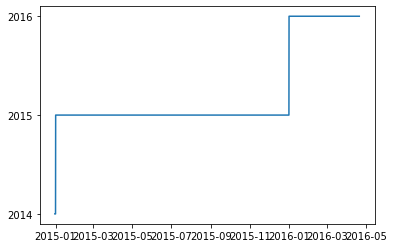

m


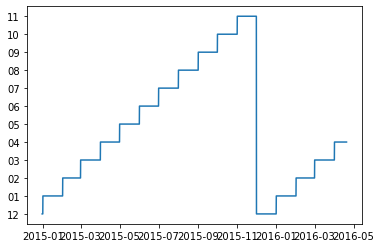

d


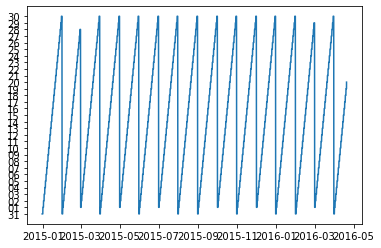

Time


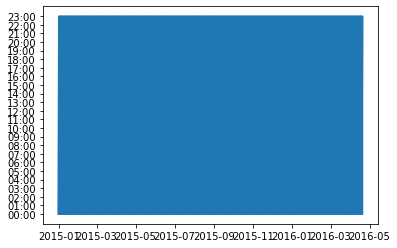

Cloud amount (1/8)


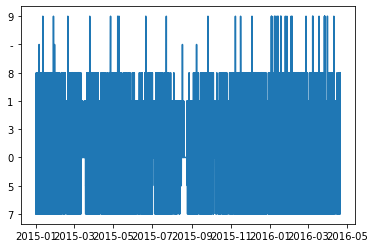

Pressure (msl) (hPa)


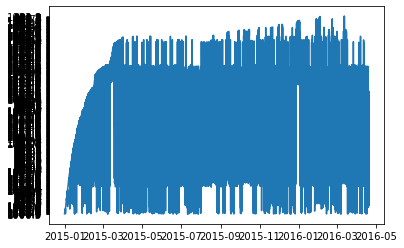

Precipitation amount (mm)


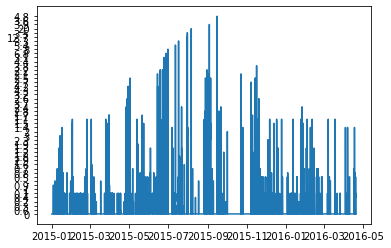

Relative humidity (%)


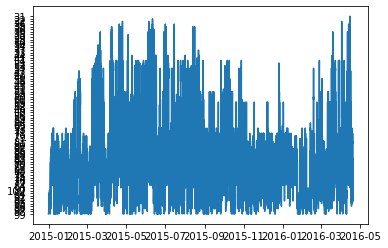

Precipitation intensity (mm/h)


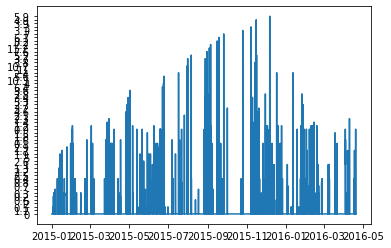

Snow depth (cm)


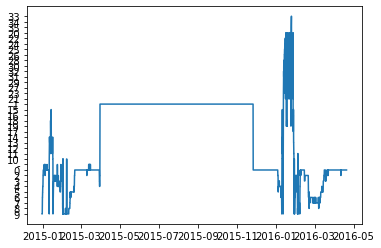

Air temperature (degC)


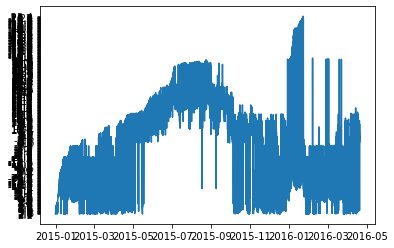

Dew-point temperature (degC)


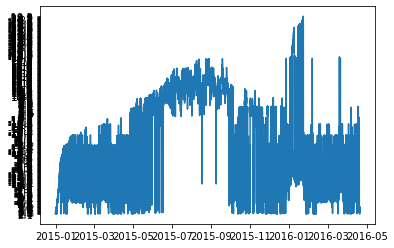

Horizontal visibility (m)


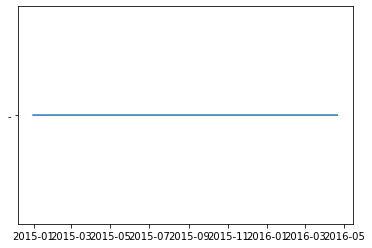

Wind direction (deg)


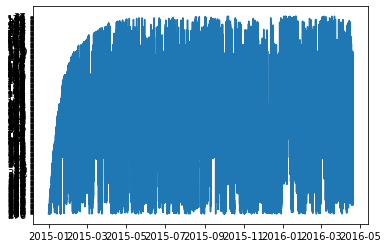

Gust speed (m/s)


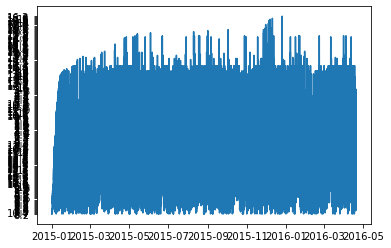

Wind speed (m/s)


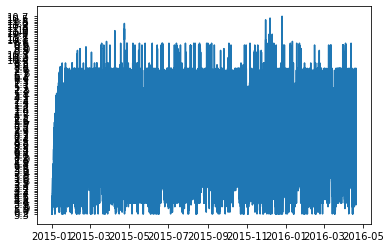

date


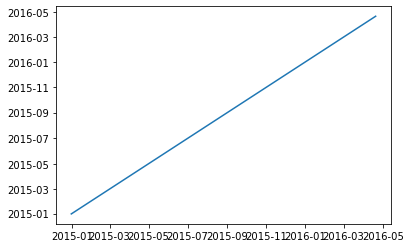

In [86]:
for column in kn.columns:
    print(column)
    plt.plot(kn['date'], kn[column])
    plt.show()